# Simple Pendulum Hamiltonian and Canonical Equations: Numerical Solution

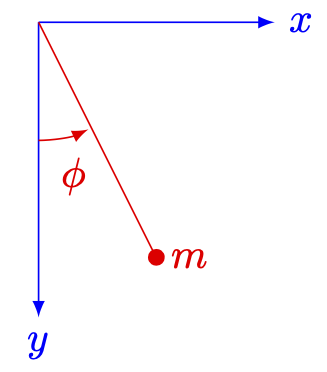

##Preamble

In [1]:
import sympy as sp

Symbolic variables

In [2]:
t,l,m,g=sp.symbols('t,l,m,g',positive=True)

Generalized coordinate

In [3]:
phi=sp.Function('phi')(t)

Cartesian Coordinates

In [4]:
x=l*sp.sin(phi)
y=l*sp.cos(phi)

Cartesian velocities

In [5]:
dot_x=x.diff(t)
dot_y=y.diff(t)


## Kinetic Energy $T$

In [6]:
T=sp.simplify(sp.Rational(1,2)*m*(dot_x**2+ dot_y**2))
T

l**2*m*Derivative(phi(t), t)**2/2

## Potential Energy $U$ (notice that $y$ increases downwards)

In [7]:
U=(-m*g*y).simplify()
U

-g*l*m*cos(phi(t))

## Lagrangian $L=T-U$

In [8]:
Lag=(T-U).simplify()
Lag

l*m*(2*g*cos(phi(t)) + l*Derivative(phi(t), t)**2)/2

## Conjugate Momentum

In [9]:
mom=sp.simplify(Lag.diff(phi.diff(t))).expand()

In [10]:
mom

l**2*m*Derivative(phi(t), t)

## Solve velocity as a function of momentum

Definition of the conjugate momenta as functions of time

In [11]:
p=sp.Function('p')(t)

In [12]:
sols=sp.solve([sp.Eq(mom,p)],[phi.diff(t)])

$\dot{\phi}$

In [13]:
sols[phi.diff(t)]

p(t)/(l**2*m)

Hamiltonian: $H(\phi,p)=p\dot{\phi}-L$

Energy as a function of $\phi$ and $\dot{\phi}$

In [14]:
E=mom*phi.diff(t)-Lag
E

l**2*m*Derivative(phi(t), t)**2 - l*m*(2*g*cos(phi(t)) + l*Derivative(phi(t), t)**2)/2

Legendre transformation: Hamiltonian as a function of $\phi$ and $p$

In [15]:
H=sp.simplify(E.subs([(phi.diff(t),sols[phi.diff(t)])]))
H

-g*l*m*cos(phi(t)) + p(t)**2/(2*l**2*m)

## Canonical Equations: $\dot{q}_i=\frac{\partial H}{\partial p_i}$, $\dot{p}_i=-\frac{\partial H}{\partial q_i}$

$\dot{\phi}$

In [16]:
dot_phi=(H.diff(p)).simplify()
dot_phi

p(t)/(l**2*m)

$\dot{p}$

In [17]:
dot_p=-(H.diff(phi)).simplify()
dot_p

-g*l*m*sin(phi(t))

## Phase Space Diagram

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Numerical functions for the angle and its canonical momentum

In [19]:
num_dot_phi=sp.lambdify([t,l,m,p],dot_phi)
num_dot_p=sp.lambdify([t,l,m,g,phi],dot_p)

Canvas for the Diagram

In [20]:
q=np.linspace(-4.0,16.0,60)
pq=np.linspace(-3,3,25)
Q,PQ=np.meshgrid(q,pq) # phase space grid
dot_Q,dot_PQ=np.zeros(Q.shape),np.zeros(PQ.shape)
NI,NJ=Q.shape

Physical parameters

In [21]:
l_num= 0.5  #(m)
g_num = 9.8 #(m/s^2)
m_num= 1.0  #(kg)

Auxiliary function for the integration of the system of first order differential equations

In [22]:
def derivatives(S,t):
  dphidt=num_dot_phi(t,l_num,m_num,S[1])
  dpdt=num_dot_p(t,l_num,m_num,g_num,S[0])
  return np.array([dphidt,dpdt])

Construction of the vector field in phase space defined by the canonical equations

In [23]:
for i in range(NI):
  for j in range(NJ):
    dot_phase_space=derivatives([Q[i,j],PQ[i,j]],0.0)
    dot_Q[i,j]=dot_phase_space[0]
    dot_PQ[i,j]=dot_phase_space[1]

Phase space diagram, version 1

Text(0.5, 1.0, 'Phase space diagram simple pendulum')

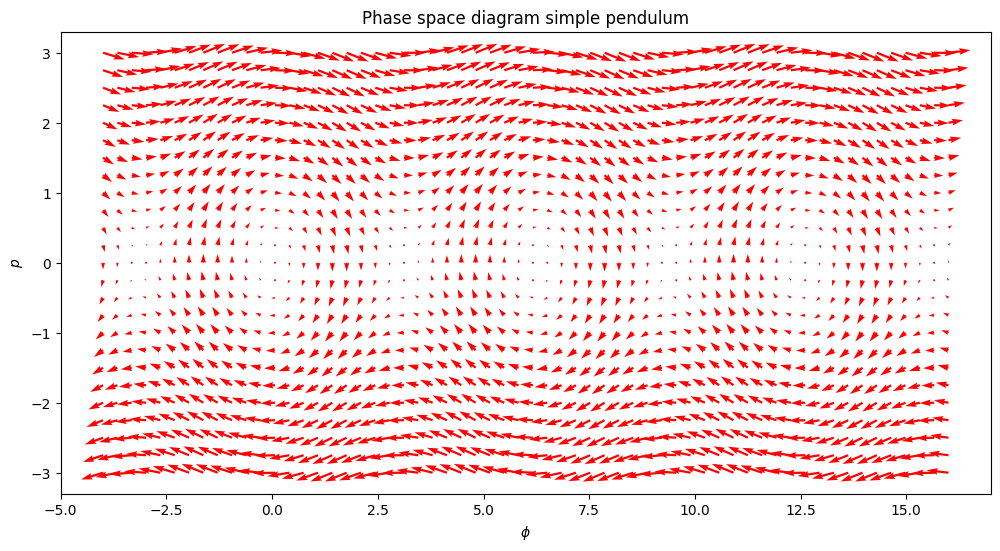

In [24]:
fig1,ax1=plt.subplots(figsize=(12,6))
ax1.quiver(Q,PQ,dot_Q,dot_PQ,color='r')
ax1.set_xlabel(r'$\phi$')
ax1.set_ylabel(r'$p$')
plt.title('Phase space diagram simple pendulum')

Phase space diagram, version 2

Text(0.5, 1.0, 'Phase space diagram simple pendulum')

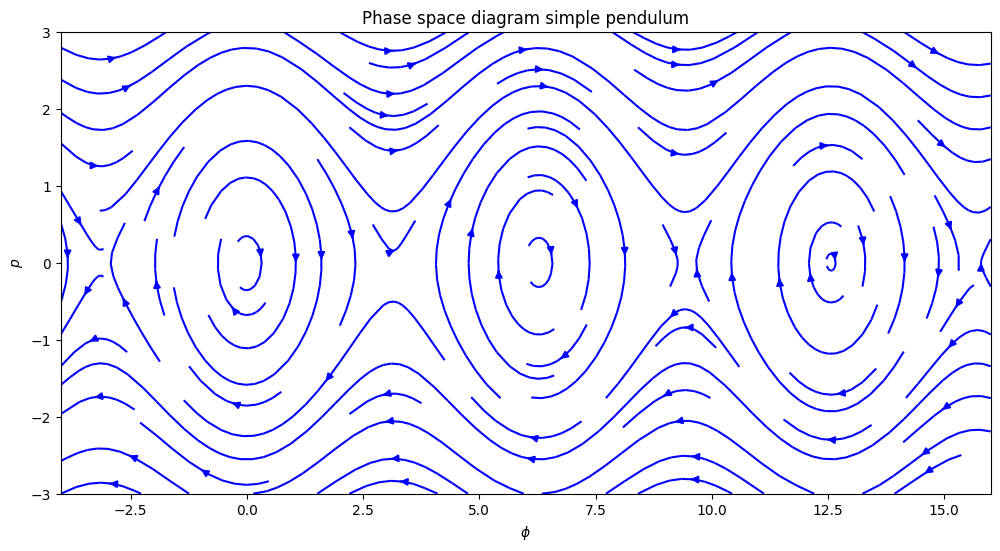

In [25]:
fig2,ax2=plt.subplots(figsize=(12,6))
ax2.streamplot(Q,PQ,dot_Q,dot_PQ,color='b')
ax2.set_xlabel(r'$\phi$')
ax2.set_ylabel(r'$p$')
plt.title('Phase space diagram simple pendulum')

## Numerical solution to the canonical equations

In [26]:
from scipy.integrate import odeint

Time frame

In [27]:
t0,tmax,dt=0.0,30.0,0.01 # Initial time, final time, time step (s)
time=np.arange(t0,tmax+dt,dt)

Phase space diagram with several solutions superimposed. There are two phases in this system, oscillations around the stable equilibrium point and complete rotations of the pendulum.

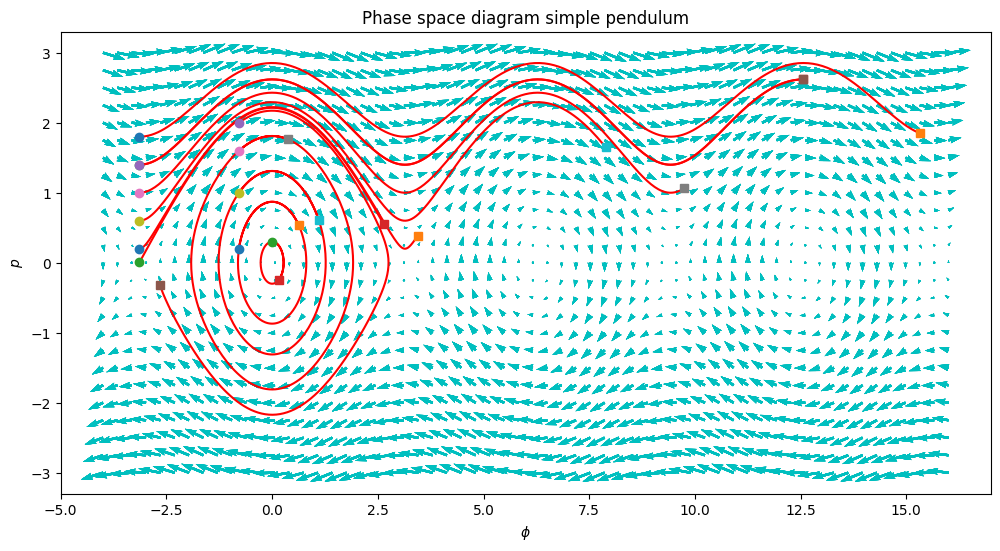

In [28]:
fig3,ax3=plt.subplots(figsize=(12,6))
for S0 in [[-np.pi,1.8],[-np.pi,1.4],[-np.pi,1.4],[-np.pi,1.0],[-np.pi,0.6],[-np.pi,0.2],[-np.pi,0.01],[-np.pi/4,2],[-np.pi/4,1.6],[-np.pi/4,1],[-np.pi/4,0.2],[0.0,0.3]]:
  answer=odeint(derivatives,S0,time)
  ax3.plot(answer[:200,0],answer[:200,1],'r') #path
  ax3.plot(answer[0,0],answer[0,1],'o') #start
  ax3.plot(answer[200,0],answer[200,1],'s') #end
  ax3.quiver(Q,PQ,dot_Q,dot_PQ,color='c')
  ax3.set_xlabel(r'$\phi$')
  ax3.set_ylabel(r'$p$')
  plt.title('Phase space diagram simple pendulum')

## Animation

In [29]:
from matplotlib.patches import Circle
import subprocess
from IPython.display import Image

Numerical solution

In [30]:
phi_data=odeint(derivatives,[-np.pi/4,1.0],time)[:,0]

Cartesian coordinates

In [31]:
x_data=l_num*np.sin(phi_data)
y_data=-l_num*np.cos(phi_data)

Animation parameters

In [32]:
r=0.02 # Bob circle radius
trail_secs=1 # Trail of the bobs position for the last trail_secs seconds
max_trail=int(trail_secs/dt) # max_trail time points

In [33]:
def make_plot(i):
  # Plot and save an image of the double pendulum configuration for time point i
  # Pendulum rods
  ax.plot([0,x_data[i]],[0,y_data[i]],lw=2,c='k')
  # Circles representing the anchor point and the bobs
  c0=Circle((0,0), r/2, fc='k')
  c1=Circle((x_data[i],y_data[i]), r, fc='b', ec='b',zorder=10)
  ax.add_patch(c0)
  ax.add_patch(c1)
  # The trail is divided into ns segments and plotted as a fading line
  ns=20
  s=max_trail//ns
  for j in range(ns):
    imin=i-(ns-j)*s
    if imin<0:
      continue
    imax=imin+s+1
    # fading
    alpha=(j/ns)**2
    ax.plot(x_data[imin:imax],y_data[imin:imax],c='r',solid_capstyle='butt',lw=2,alpha=alpha)
  # Set the limits of the plots
  ax.set_xlim(-l_num-3*r,l_num+3*r)
  ax.set_ylim(-l_num-3*r,l_num+3*r)
  ax.set_aspect('equal',adjustable='box')
  plt.xlabel('x[m]')
  plt.ylabel('y[m]')
  plt.savefig('_img{:04d}.png'.format(i//di), dpi=72)
  plt.cla()

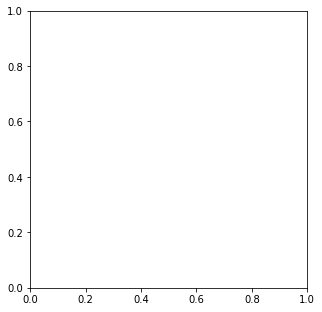

In [34]:
#Make an image every di time points, corresponding to a grame rate of fps frames per second
fps=10
di=int(1/fps/dt)
fig=plt.figure(figsize=(5,5), dpi=72)
ax=fig.add_subplot(111)

for i in range(0,time.size,di):
  make_plot(i)

In [35]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.10.23+dfsg-2.1ubuntu11.7).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [36]:
i="*.png"
o="animation.gif"
subprocess.call("convert -delay 10 -loop 0 " + i + " " + o, shell=True)

0

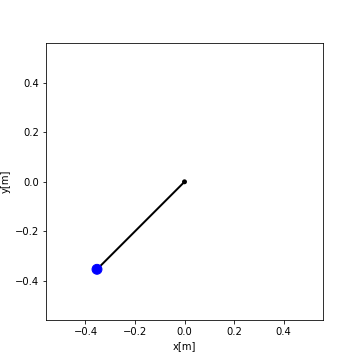

In [37]:
fname='animation.gif'
Image(open(fname,'rb').read())

## Results

### Rotational Phase

Rotation

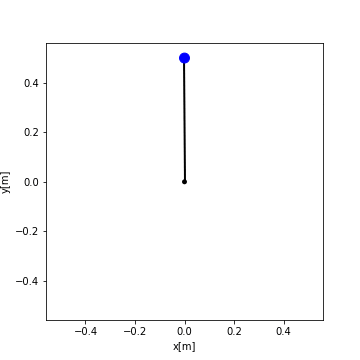

Rotation near the separatrix

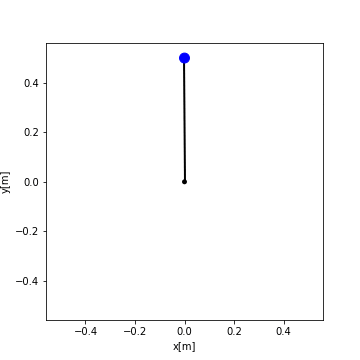

Oscillation near separatrix

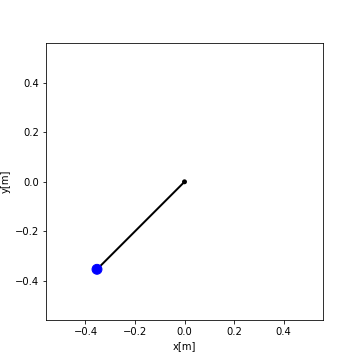

Oscillation

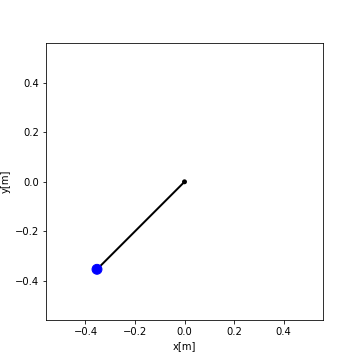